# Random Forest

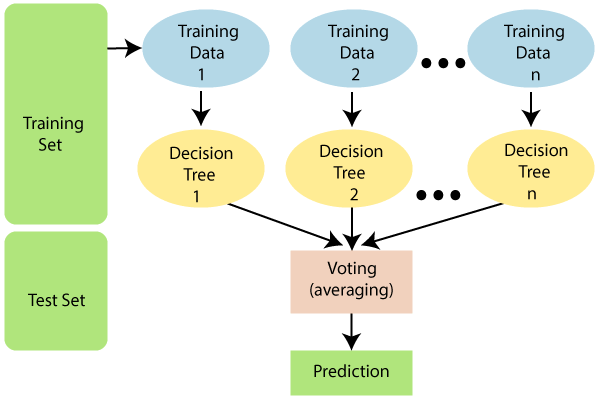

Random forest is an ensemble learning algorithm that can be used for both classification and regression tasks. In regression tasks, the algorithm builds a multitude of decision trees at training time and outputs the mean prediction of the individual trees as the final prediction.

Here are the steps involved in using random forest as a regressor algorithm:

1. Data preparation: Prepare your data by splitting it into training and testing sets.

2. Model initialization: Initialize the random forest regressor with hyperparameters such as the number of trees to use, the maximum depth of each tree, and the minimum number of samples required to split an internal node.

3. Training the model: Train the random forest regressor on the training data.

4. Making predictions: Use the trained model to make predictions on the testing data.

5. Evaluating the model: Evaluate the performance of the model using evaluation metrics such as mean squared error, mean absolute error, and R-squared.

Random forest is a powerful algorithm that can handle complex datasets and non-linear relationships between features and target variables. It also has built-in methods for feature selection, which can help improve model accuracy.

### Random forest for feature selection

Random forest can be used for feature selection by analyzing the importance of each feature in the model. The algorithm assigns an importance score to each feature based on how much it contributes to the overall accuracy of the model.

The feature importance scores can be obtained using the .feature_importances_ attribute of the trained random forest model. We can then rank the features based on their importance scores and select the top N features to use in our final model.

This process of feature selection can help us reduce the dimensionality of our dataset, improve model performance, and make our model more interpretable by focusing on the most important features

### hyperparameters of random forest

The hyperparameters of random forest that can be tuned to improve accuracy are:

1. n_estimators: The number of decision trees in the forest. Increasing this value can improve performance but also increases computation time.

2. max_depth: The maximum depth of each decision tree. Increasing this value can lead to overfitting, while decreasing it can lead to underfitting.

3. min_samples_split: The minimum number of samples required to split an internal node. Increasing this value can reduce overfitting.

4. min_samples_leaf: The minimum number of samples required to be at a leaf node. Increasing this value can also reduce overfitting.

5. max_features: The maximum number of features considered for splitting a node. This can be set to "sqrt" or "log2" to limit the number of features considered.

6. criterion: The function used to measure the quality of a split. The default is "gini", but "entropy" can also be used.

7. bootstrap: Whether or not to use bootstrapping when building decision trees. Setting this to False can reduce overfitting.

8. class_weight: Whether or not to balance the classes by assigning weights to each class. This can improve performance when dealing with imbalanced datasets.

Tuning these hyperparameters using techniques like grid search or random search can help optimize the performance of the random forest algorithm.

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [130]:
data = pd.read_excel("Estimate_power2.xlsx")
data.head()

hour  unit_no  temp  moisture  power  mvar
0     1        1     3        94    250    22
1     2        1     3        96    250    23
2     3        1     2        95    250    23
3     4        1     2        95    251    25
4     5        1     2        95    252    26

In [131]:
data=data[data["power"]>100]
data.shape

(999, 6)

In [132]:
data.isnull().sum()

hour        0
unit_no     0
temp        0
moisture    0
power       0
mvar        0
dtype: int64

In [133]:
X = data[["moisture","unit_no","temp","power"]]
y = data[["mvar"]]

In [134]:
X

moisture  unit_no  temp  power
0          94        1     3    250
1          96        1     3    250
2          95        1     2    250
3          95        1     2    251
4          95        1     2    252
..        ...      ...   ...    ...
994         6        6    15    224
995         8        6    16    240
996        21        6    18    238
997        11        6    19    236
998        19        6    19    237

[999 rows x 4 columns]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Normalization or standardization of data points is not necessary when using random forest regressors. Random forests are robust to outliers and can handle variables with different scales and distributions. However, it is always a good practice to preprocess the data and remove any irrelevant or redundant features before training the model.

In [136]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

In [137]:
# Training the Decision Tree Regression model on the whole dataset
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

### R-squared or R2

R-squared or R2 or coefficients of determination is defined as the proportion of variation of data points explained by the regression line or model. It can be determined as a ratio of total variation of data points explained by the regression line (Sum of squared regression) and total variation of data points from the  mean (also termed as sum of squares total or total sum of squares). The following formula represents the ratio. y_hat represents the prediction or a point on the regression line, y_bar represents the mean of all the values and y_i represents the actual values or the points.

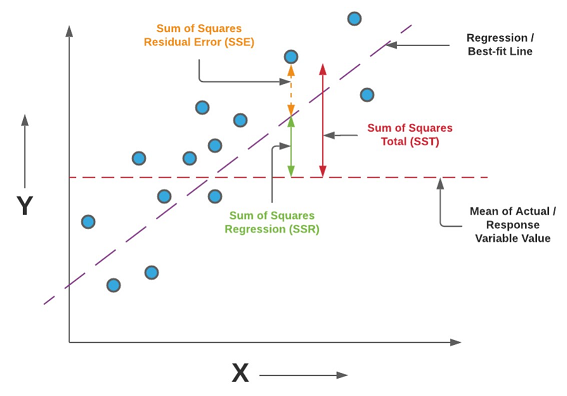

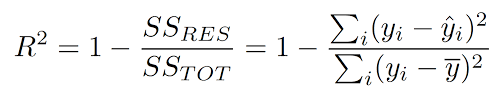

In [138]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("Mean squared error:",mse)
print("R-squared:",r2)

Mean squared error: 18.9526133192398
R-squared: 0.9202332659407422


In [139]:
rf.fit(X_train_scaled, y_train)
y_pred=rf.predict(X_test_scaled)

In [140]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("Mean squared error:",mse)
print("R-squared:",r2)

Mean squared error: 31.598042589929133
R-squared: 0.8656427074796446


# Tuning the hyperparameters

In [141]:
# Define the SVR model
rf = RandomForestRegressor(random_state = 0)

# Define the hyperparameters to tune
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
Best score: 0.9172540967953919


In [142]:
regressor = RandomForestRegressor(**grid_search.best_params_,random_state=42)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

In [143]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("Mean squared error:",mse)
print("R-squared:",r2)

Mean squared error: 24.787231541459892
R-squared: 0.8904132480636042


# Trying dimension reduction for the model

### PCA

PCA can help identify which features are contributing the most to the variance in the data and can be used to reduce the dimensionality of the dataset. To identify which feature should be removed, you can look at the loadings or weights assigned to each feature by the PCA algorithm. Features with low loadings or weights may not be contributing much to the overall variance in the data and may be good candidates for removal. Additionally, you can compare the performance of the model with and without each feature to see which ones have the most impact on the model's performance.

In [144]:
# Apply PCA to reduce the number of features to 3
pca = PCA(n_components=X.shape[1])
X_train_pca = pca.fit_transform(X_train)

In [145]:
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print(X_train.columns.values.tolist())

[0.6712255  0.32282479 0.00338923 0.00256049]
['moisture', 'unit_no', 'temp', 'power']


In [146]:
explained_variances = pca.explained_variance_ratio_

In [147]:
loadings = pca.components_[0]

In [148]:
for i in range(len(explained_variances)):
    print(f"Feature {i+1}: explained variance = {explained_variances[i]}, loading = {loadings[i]}")

Feature 1: explained variance = 0.6712254985231214, loading = 0.28140675000124427
Feature 2: explained variance = 0.3228247867408931, loading = 0.017308997915823326
Feature 3: explained variance = 0.003389228927286437, loading = -0.040852203496650474
Feature 4: explained variance = 0.0025604858086989654, loading = -0.958562328236592


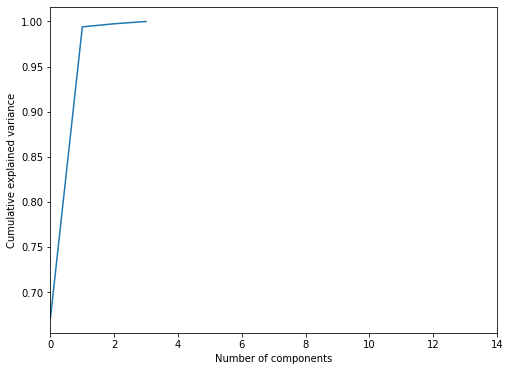

In [149]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

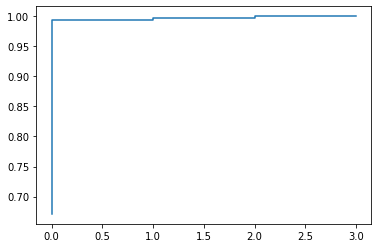

In [150]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

In [151]:
# pca = PCA(n_components=X.shape[1])
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)
# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_regressor.fit(X_train_pca, y_train)
# y_pred = rf_regressor.predict(X_test_pca)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [152]:
pipeline = Pipeline([
    ('pca', PCA(n_components=X.shape[1])),
    ('rf', RandomForestRegressor(bootstrap= True, max_depth= 80, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 1000))
])

In [153]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [154]:
# Calculate Mean Squared Error (MSE) of the predictions 
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("Mean squared error:",mse)
print("R-squared:",r2)

Mean squared error: 43.438682225921724
R-squared: 0.758922246696875


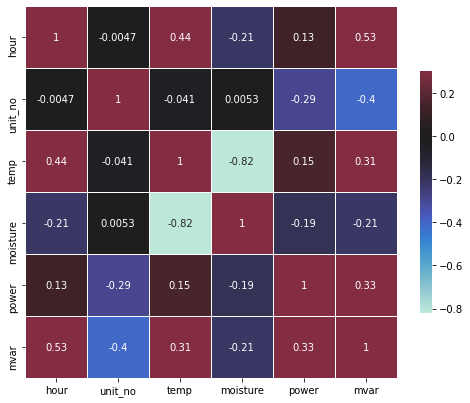

In [155]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

As you can see , there is strong correlation between "temp" and "moisture" features , so it is not a bad idea to remove one of them and check the performance of the model with other features.But it should be noted that we have to compare the relations of these to feature with the target and choose the one which has more relation with target.

In [156]:
X = data[["unit_no","temp","power"]]
y = data[["mvar"]]

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [158]:
# Training the Decision Tree Regression model on the whole dataset
regressor = RandomForestRegressor(**grid_search.best_params_,random_state=42)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

In [159]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("Mean squared error:",mse)
print("R-squared:",r2)

Mean squared error: 39.54426210373829
R-squared: 0.8203329310233671


### Time complexity of a random forest model

The time complexity of a random forest model depends on the number of trees in the forest and the depth of each tree. For training, the time complexity is O(N * M * log(M)) where N is the number of samples and M is the number of features. This is because each tree is built using a subset of the data and a random subset of features, and each split operation requires sorting the data based on a feature. The log(M) factor comes from the fact that there are at most M features to consider at each split.

For prediction, the time complexity is O(K * T * log(M)) where K is the number of samples to predict and T is the number of trees in the forest. This is because each sample is passed through each tree and the prediction is made based on the majority vote of the trees.

The space complexity of a random forest model is primarily determined by the number of trees in the forest and the depth of each tree. Each tree requires O(M * D) space where D is the depth of the tree. Therefore, the total space complexity is O(T * M * D) where T is the number of trees in the forest.

### Use cases

Random forest regressors are best suited for use cases where there is a large amount of data with multiple input variables and a non-linear relationship between the input and output variables. They can be used for a variety of regression tasks such as predicting stock prices, housing prices, and customer churn rates. They are also useful for handling missing data and outliers in the dataset. Additionally, random forest regressors can handle both continuous and categorical variables, making them a versatile tool for a wide range of regression problems.